<h1> <center> Generative AI in Risk and Finance </h1>
<h3> <center> Developing a Company Risk Agent </h3>
<center> <small>by <a href="https://juliandoerr.com">Julian Dörr</a></small>
<br>
<br>

_________________________
_________________________

## <a id='toc1_'></a>About this Course

- 1. [About this Course](#toc1_)    
  - 1.1. [What you will learn](#toc1_1_)    
  - 1.2. [Prerequisites](#toc1_2_)    
- 2. [What is Generative AI?](#toc2_)    
- 3. [Application of Generative AI in Risk Management](#toc3_)    
  - 3.1. [A GenAI Proof of Concept: Company Risk Agent](#toc3_1_)    
- 4. [Developing a Company Risk Agent](#toc4_)    
  - 4.1. [Build a document vector database](#toc4_1_)    
    - 4.1.1. [Parse documents](#toc4_1_1_)    
    - 4.1.2. [Chunk documents](#toc4_1_2_)    
    - 4.1.3. [Vectorize chunks](#toc4_1_3_)    
  - 4.2. [Extend to an agentic RAG system](#toc4_2_)    
    - 4.2.1. [Extract topic](#toc4_2_1_)    
    - 4.2.2. [Extract companies](#toc4_2_2_)    
    - 4.2.3. [Retrieve context](#toc4_2_3_) 
    - 4.2.6. [Generate answer](#toc4_2_4_)    
    - 4.2.7. [Build the graph](#toc4_2_5_)    
  - 4.3. [Chatbot Provisioning](#toc4_3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=4
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_'></a>What you will learn

- **Core GenAI concepts**: LLMs, embedding models, RAG, and agents.

- **Hands-On with GenAI platforms**: OpenAI, HuggingFace, Ollama, and Tavily.

- **Practical document processing**: Parse, chunk, and vectorize annual reports using LangChain and LlamaIndex to build a vector database.

- **Develop agentic RAG system**: Use LangGraph to explore graph fundamentals like states, routing, map-reduce, and tool calling to develop an agent capable of answering risk-related questions about DAX 40 companies.

- **Fundamentals of prompt engineering**

- **Blueprint for developing your own agentic workflows**

### <a id='toc1_2_'></a> Prerequisites

Generative AI (GenAI) applications often rely on third-party models and tools, and so does this course. Please follow the instructions in this [video](https://www.youtube.com/watch?v=PNsoqKX85pg) to get API Keys/installation instructions for the following third-party solutions:

1. [**HuggingFace**](https://huggingface.co/): We use HuggingFace to get access to embedding models that can be downloaded on your local machine. Alternatively HuggingFace offers an inference API that can be used with a rate limit under the free tier.

2. [**Tavily**](https://www.tavily.com/): We use Tavily as search engine designed for to get access to real-time information from the internet.

3. [**OpenAI**](https://openai.com/) (*optional*): We use OpenAI's GPT LLM model series as an alternative to the free, open-source, LLMs. Using OpenAI's models is *not* free of charge. If you do not want to work with OpenAI's models, you can still follow the entire course material. However, OpenAI's GPT model series comes with some advantages such as lower latency and often higher accuracy.

4. [**Ollama**](https://ollama.com/): We use Ollama to run open source LLMs locally on your local machine. It acts as a model manager and runtime, handling the complexities of downloading, configuring, and using open-source LLMs.

Create a file called `.env` in the root directory of this repository and add the API Keys from HuggingFace, Tavily and OpenAI to this file:<br>
    `HUGGINGFACE_API_KEY = <Your HuggingFace token>`<br>
    `TAVILY_API_KEY = <Your Tavily key>`<br>
    `OPENAI_API_KEY = <Your OpenAI key>`

## <a id='toc2_'></a> What is Generative AI?

To understand Generative AI's place in the broader AI landscape, it's important to understand how different AI technologies relate to and build upon each other.

Generative AI is fundamentally **based on deep learning methods**, but it distinguishes itself by ***creating* new content**, such as language.
<div style="text-align: center;">
    <img src="img/ai_ml_dl_nlp_genai.png" alt="AI, ML, DL, NLP & GenAI" width="900" style="height: auto;">
    <p><small>Image source: Author</small></p>
</div>

<font color="#58e4d4"><b>Artificial Intelligence (AI)</b></font>

AI is the overarching field that encompasses all technologies and systems designed to **simulate human intelligence**. This includes tasks like reasoning, problem-solving, learning, and decision-making.

<font color="#20b49c"><b>Machine Learning (ML)</b></font>

Machine learning is a subset of AI that enables systems to **learn from data** and improve their performance over time without being explicitly programmed. ML algorithms identify patterns in data and use these patterns to **make predictions or decisions**.

<font color="#086c5c"><b>Deep Learning (DL)</b></font>

Deep learning is a specialized branch of ML that uses **artificial neural networks** inspired by the human brain. These networks are particularly effective at processing large amounts of **unstructured data**, such as images, text, and audio.

<font color="#08544c"><b>Natural Language Processing (NLP)</b></font>

NLP is an applied field of artificial intelligence focused on **understanding, interpreting, and making human language comprehensible to machines**. It powers applications like rule-based chatbots, translation tools, and sentiment analysis.

<font color="#08241c"><b>Generative AI (GenAI)</b></font>:

GenAI is a branch of AI that **uses deep learning to generate new content** such as text, images, and videos. While it shares techniques with NLP, which focuses on processing language data, GenAI’s core strength lies in content creation across multiple media, making it a distinct and transformative technology within AI.

> **Generative AI (GenAI)** is a special type of Artificial Intelligence that can learn from and mimic large amounts of data to **create content** such as text, images, music, videos, code, and more.

> GenAI models are often termed as **Foundation Models** because of their **capability to conduct different tasks** such as classification, translation, summarization at once. 

> GenAI models which are **capable to process different data types** (e.g. text, image, video) are called **Multi-Modal Models**

## <a id='toc3_'></a> Application of Generative AI in Risk Management

GenAI holds many promises and is identified by some practitioners as the **fourth industrial revolution**. In the following, there are images which help to narrow down the projected impact of GenAI and its importance in the field of Risk and Finance.

**Generative AI** could create **significant** additional **value potential** above what could be unlocked by traditional AI and analytics.
<div style="text-align: center;">
    <img src="img/genai_impact.png" alt="GenAI Impact" width="1000" style="height: auto;"/>
    <p><small>Image source: <a href="https://www.mckinsey.com/capabilities/mckinsey-digital/our-insights/the-economic-potential-of-generative-ai-the-next-productivity-frontier#business-value">McKinsey, 2023</a></small></p>
</div>

Generative AI use cases will have different impacts on business functions across industries with the **Banking sector** as **one of the key sectors**.
<div style="text-align: center;">
    <img src="img/genai_industry.png" alt="GenAI Impact in different Roles and Industries" width="900" style="height: auto;"/>
    <p><small>Image source: <a href="https://www.mckinsey.com/capabilities/mckinsey-digital/our-insights/the-economic-potential-of-generative-ai-the-next-productivity-frontier#business-value">McKinsey, 2023</a></small></p>
</div>

**Gartner’s Use-Case Prism** for Generative AI: Selected High-Impact Applications in Banking Based on Practical Experience
<div style="text-align: center;">
    <img src="img/genai_use_cases.png" alt="GenAI Use Cases" width="900" style="height: auto;"/>
    <p><small>Image source: Author adapted from <a href=https://www.gartner.com/en/topics/generative-ai>Gartner, 2025</a></small></p>
</div>

1. **Risk Assessment and Fraud Detection**
    
AI systems that detect, simulate, and prevent fraud by analyzing transaction data, **generating synthetic fraud scenarios**, and flagging suspicious activities in real time.

Why generative AI is needed? Fraud patterns evolve rapidly. Generative AI can simulate new fraud types, generate synthetic data for robust model training, and analyze unstructured data (e.g., transaction notes) to adapt to novel threats—something traditional models struggle with.

_________

2. **Personalized Financial Advisor**<br>

AI systems that provide personalized **financial advice**, investment recommendations, and product suggestions to customers, **tailored to** their **unique profiles**, goals, and market conditions.

Why generative AI is needed?
Personalized advice requires **synthesizing unstructured data** (e.g., transaction history, market news) and **generating context-aware, natural language recommendations**. Generative AI enables dynamic, human-like interactions and explanations that traditional AI cannot match.

_______

3. **Synthetic Credit Data**

The use of generative AI to create realistic, **privacy-preserving synthetic datasets** that **mimic real credit data**. These datasets are used for model training, testing, scenario analysis, and regulatory compliance—without exposing sensitive customer information.

Why generative AI is needed? Only generative models can capture the complex statistical relationships and rare edge cases found in real credit data, producing synthetic data that is both useful and privacy-safe. Traditional anonymization or randomization methods cannot achieve this fidelity or regulatory compliance.

_________

4. **Internal Legal/Regulation/Compliance Filing Assistant**

AI-powered assistants that automate the **drafting, summarization, and filing of regulatory and legal documents**. They ingest vast, unstructured legal texts and generate compliant reports, summaries, or responses for internal and external stakeholders.

Why generative AI is needed? Regulatory documents are lengthy, complex, and frequently updated. **LLMs** can understand, synthesize, and generate human-like text from these sources, **adapt**ing **to new rules and jurisdictions far more flexibly than rule-based or traditional AI systems**.

___________

5. **Internal Knowledge Bot**

Generative AI-powered bots that **answer employee questions**, **summarize internal documents**, and automate report writing by ingesting and synthesizing information from across the organization.

Why generative AI is needed? Internal knowledge is scattered across emails, documents, and databases. Generative AI can process and generate answers from this unstructured data, supporting natural language queries and up-to-date responses—capabilities beyond search or rule-based bots

____________

6. **AI Frontline Copilot/Customer Support**

Conversational AI agents that provide **24/7 customer support**, handle routine banking tasks, and escalate complex issues, **delivering human-like**, context-aware interactions across channels.

Why generative AI is needed? Generative AI enables **natural, empathetic conversations**, understands context and intent, and generates personalized responses—far surpassing the capabilities of rule-based chatbot

___________

❓ Do you have any ideas for GenAI use cases in your research field? Tell us!

In this course, we will develop a proof of concept (PoC) that make the application of GenAI in Finance and Risk more tangible. We will develop a **"Risk Agent"**, a chatbot which **provides up-to-date insights into the risks and challenges faced by publicly listed companies, leveraging their annual reports** to deliver precise, context-rich answers to any user query. This may be of help for stakeholders such as

- Financial Analysts and Investment Professionals such as portfolio managers, equity analysts, and hedge fund managers, need to assess the risks and challenges of companies to make informed investment decisions.
- Corporate Risk Managers who need to benchmark their own risk disclosures against competitors or industry standards.
- ESG analysts focus on evaluating companies' sustainability and governance practices. Risk disclosures in annual reports often include information about environmental and social risks, which are critical for ESG assessments.

### <a id='toc3_1_'></a> A GenAI Proof of Concept: Company Risk Agent

In the remainder of this course, we will follow a **step-by-step process** to **develop** the **Risk Agent**. At its core, the Risk Agent is a **chatbot powered by a Large Language Model (LLM)** that can generate accurate and contextually relevant answers to user queries about the risks single DAX 40 companies are facing.

> **Large Language Models (LLMs)**, are very large deep learning models that are **pre-trained on vast amounts of data**. They are highly flexible as a single model can **perform** completely **different generative tasks** such as answering questions, summarizing documents, translating languages and completing sentences.

A chatbot that relies solely on a LLM is **limited to** the **"world knowledge"** the LLM **acquired during** its **training** on historical data.
<div style="text-align: center;">
    <img src="img/llm.png" alt="LLM Chatbot" width="400" style="height: auto;"/>
    <p><small>Image source: Author</small></p>
</div>

A chatbot relying only on an LLM’s training data lacks **up-to-date and domain-specific knowledge**. To overcome this, the Risk Agent integrates **annual report disclosures from companies** using a **Retrieval Augmented Generation (RAG) system**. RAG retrieves relevant, current information from external sources and provides it as context to the LLM, enabling the chatbot to generate **more accurate, timely, and context-aware responses** about risks faced by DAX 40 companies.

> **Retrieval Augmented Generation (RAG)** is a technique that **enhances LLM-generated responses** by **grounding them **in external, often proprietary, knowledge sources**. It retrieves relevant information from databases or documents and uses this context to guide the model’s output, **reducing hallucinations and improving accuracy**.

RAG chatbot based on knowledge from annual reports.
<div style="text-align: center;">
    <img src="img/rag.png" alt="RAG Chatbot" width="400" style="height: auto;"/>
    <p><small>Image source: Author</small></p>
</div>

Additionally, we will enhance the system with an **agentic workflow** that allows the chatbot to **search the internet** when it cannot answer questions using information from annual reports.

Agentic chatbot based on knowledge from annual reports _and_ the internet.
<div style="text-align: center;">
    <img src="img/agentic_rag.png" alt="Agentic Chatbot" width="450" style="height: auto;"/>
    <p><small>Image source: Author</small></p>
</div>

> An **agentic workflow** is an AI process where autonomous agents **use tool calling to access multiple external information sources**, enabling the bot to gather relevant data from various knowledge bases and make informed decisions with minimal human input.

A RAG system enhances an LLM's knowledge with up-to-date domain information from a document base, while an agentic RAG system allows it to independently decide which information sources to retrieve from. Grounding answers on dedicated information sources reduces hallucinations of chatbots.
<div style="text-align: center;">
    <img src="img/llm_rag_agentic_rag.png" alt="Chatbot architectures" width="1100" style="height: auto;"/>
    <p><small>Image source: Author</small></p>
</div>

> **Hallucination** in AI refers to when a model generates **false or misleading information** that appears plausible but is not based on factual data.

## <a id='toc4_'></a> Developing a Company Risk Agent

Moving on, we will primarily work with [LlamaIndex](https://docs.llamaindex.ai/en/stable/) and [LangChain](https://www.langchain.com/)  which are both leading Python frameworks for building LLM-powered applications.
<div style="text-align: center;">
    <img src="img/langchain_llamaindex.png" alt="LangChain and LlamaIndex" width="800" style="height: auto;">
    <p><small>Image source: <a href=https://superwise.ai/blog/lets-talk-about-llamaindex-and-langchain>Superwise</a></small></p>
</div>

### <a id='toc4_1_'></a> Build a document vector database

We begin by creating a **vector store, a specialized database** that **manages information as mathematical vectors**, which represent the meaning of different sections of companies' annual reports. This vector store is crucial for the RAG system as it enables the retrieval of relevant, **domain-specific information** that enhances the chatbot's knowledge base, **allowing the chat system to provide more accurate responses** that the underlying **LLM alone may struggle to deliver**.

> A **vector store** is a specialized database that **stores** and manages vector embeddings—**numerical representations of text** or other unstructured data—enabling efficient similarity search and retrieval of relevant information based on semantic meaning rather than exact keyword matches.

<div style="text-align: center;">
    <img src="img/vector_store.png" alt="Vector Store" width="500" style="height: auto;">
    <p><small>Image source: Author</small></p>
</div>

To build the vector store we make use of an embedding model.
<div style="text-align: center;">
    <img src="img/vector_embeddings.png" alt="Vector Store" width="1000" style="height: auto;">
    <p><small>Image source: Author</small></p>
</div>

> An **embedding model** is a mathematical framework that transforms data, such as words or phrases, into **vector representations that capture** their **contextual meanings**.

In the first step, we load the **HuggingFace** access token into our project's environment to gain **access to** various **open-source embedding models** that convert annual reports into context-aware vector representations.

In [1]:
import os
from dotenv import load_dotenv
import logging

# Suppress INFO and lower level logs from the root logger
logging.getLogger().setLevel(logging.WARNING)

# Load environment variables from .env file
load_dotenv()

# Access the API key
huggingface_api_key = os.getenv("HUGGINGFACE_API_KEY")

#### <a id='toc4_1_1_'></a> Parse documents

The original annual reports for all DAX 40 companies from 2023 are located in the [`./data/raw/reports/`](data/raw/reports) directory. These reports serve as the foundation for building our vector store.

We use `SimpleDirectoryReader` from `llama_index` to efficiently load and parse the annual reports, automatically handling the .pdf format. We'll start with Adidas's 2023 report and later apply the same preprocessing steps to all DAX 40 companies' reports.

In [2]:
from llama_index.core import SimpleDirectoryReader

documents = SimpleDirectoryReader(
    input_files=['data/raw/reports/adidas_2023.pdf']).load_data()
print(f"In total {len(documents)} Document objects have been loaded.")

In total 321 Document objects have been loaded.


In [3]:
len(documents)

321

As you can see, `SimpleDirectoryReader` returns a list of **321 `Document` objects**, with **each** element **representing a single page from the** previously loaded **annual report**.

In [4]:
vars(documents[165])

{'id_': '7da02721-9fed-4993-83b6-ba4c7d62d92c',
 'embedding': None,
 'metadata': {'page_label': '166',
  'file_name': 'adidas_2023.pdf',
  'file_path': 'data\\raw\\reports\\adidas_2023.pdf',
  'file_type': 'application/pdf',
  'file_size': 20968677,
  'creation_date': '2025-05-04',
  'last_modified_date': '2025-02-02'},
 'excluded_embed_metadata_keys': ['file_name',
  'file_type',
  'file_size',
  'creation_date',
  'last_modified_date',
  'last_accessed_date'],
 'excluded_llm_metadata_keys': ['file_name',
  'file_type',
  'file_size',
  'creation_date',
  'last_modified_date',
  'last_accessed_date'],
 'relationships': {},
 'metadata_template': '{key}: {value}',
 'metadata_separator': '\n',
 'text_resource': MediaResource(embeddings=None, data=None, text="1 2 3 4 5 \nT O  O U R SHA REHO L D ERS  GRO U P  MAN A GEMEN T  REP O RT – \nO U R CO MPA N Y \nGRO U P  MAN A GEMEN T  REP O RT – \nF I N A N CI AL  REVI EW  \nCO N SO L I DA T ED  FI N AN CI A L \nST A T EMEN T S \nA D D I T I ON 

A `Document` object includes a unique ID, relevant metadata, and the content found within the document, categorized by the following data types:
- text_resource
- image_resource
- audio_resource
- video_resource

In our case, the annual reports consist solely of text.

Next, we utilize the custom function `display_document_with_image_side_by_side()` to visually compare the text parsed by `SimpleDirectoryReader` with the original document. This allows for an effective side-by-side evaluation of the extracted content.

In [5]:
from util import display_document_with_image_side_by_side

2026-01-10 13:19:16,363 - INFO - Loading faiss with AVX512 support.
2026-01-10 13:19:16,364 - INFO - Could not load library with AVX512 support due to:
ModuleNotFoundError("No module named 'faiss.swigfaiss_avx512'")
2026-01-10 13:19:16,364 - INFO - Loading faiss with AVX2 support.
2026-01-10 13:19:16,682 - INFO - Successfully loaded faiss with AVX2 support.
2026-01-10 13:19:16,691 - INFO - Failed to load GPU Faiss: name 'GpuIndexIVFFlat' is not defined. Will not load constructor refs for GPU indexes.


In [6]:
display_document_with_image_side_by_side(
    document=documents[165],
    image_path='img/annual_report.png'
)

When using `text_resource` in the Risk Agent, we must **remove repetitive header information** from each page because it adds noise and distracts from the core content. Our focus is solely on pages discussing companies' **Risk and Opportunity**. To handle this effectively, we aim to **merge all relevant pages** of an annual report into a single `Document` object, ensuring that paragraphs split across pages are processed seamlessly as one continuous text.

In [7]:
pre_process_dict = {
    "adidas": {
        "pages": range(165, 187, 1),
        "string_to_remove": """1 2 3 4 5 \nT O  O U R SHA REHO L D ERS  GRO U P  MAN A GEMEN T  REP O RT – \nO U R CO MPA N Y \nGRO U P  MAN A GEMEN T  REP O RT – \nF I N A N CI AL  REVI EW  \nCO N SO L I DA T ED  FI N AN CI A L \nST A T EMEN T S \nA D D I T I ON A L I N FO RMA T I ON \n \n\\d{1,3} \n    \n    \n A N N U A L  R E P O R T  2 0 2 3""",
    }
}

In [8]:
import re
from llama_index.core import Document

pages = pre_process_dict["adidas"].get("pages")
string_to_remove = pre_process_dict["adidas"].get("string_to_remove")
overall_text = ""

for page in pages:
    document = documents[page]
    text = document.text
    text = re.sub(string_to_remove, "", text)
    overall_text = "\n".join([overall_text, text])

report = Document(
    text=overall_text, 
    metadata={'company': "adidas", 'year': 2023})

In [9]:
vars(report)

{'id_': '7974b22d-f854-4dcb-a505-cd83ce129b14',
 'embedding': None,
 'metadata': {'company': 'adidas', 'year': 2023},
 'excluded_embed_metadata_keys': [],
 'excluded_llm_metadata_keys': [],
 'relationships': {},
 'metadata_template': '{key}: {value}',
 'metadata_separator': '\n',
 'text_resource': MediaResource(embeddings=None, data=None, text="\n \nRisk and Opportunity Report \nIn order to remain competitive and ensure sustainable success, adidas consciously takes risks and \ncontinuously explores and develops opportunities. Our risk and opportunity management principles and \nsystem provide the framework for our company to conduct business in a well-controlled environment. \nRisk and opportunity management principles \nThe key objective of the risk and opportunity management is to support business success and protect the \ncompany as a going concern through an opportunity-focused but risk-aware decision-making framework. \nOur Enterprise Risk Management Policy outlines the principles

#### <a id='toc4_1_2_'></a> Chunk documents

In RAG systems, chunking is the process of **dividing a large document into smaller, manageable pieces** or "chunks" for easier storage and processing. These chunks are indexed and utilized during the retrieval phase to supply relevant information to the LLM, enhancing its performance and contextual understanding.

Chunking is essential in RAG for several reasons:

- **Efficient Retrieval**: Chunking enables the system to quickly locate and retrieve only the most relevant parts, avoiding processing entire documents.

- **Improved Accuracy**: Smaller chunks preserve context better, ensuring responses are focused and relevant to the query.

- **Token Limit Compliance**: Dividing documents into smaller pieces keeps context input within the model’s token limit, respecting its context window size.

We use the `SentenceSplitter` class which splits the document into chunks with a preference for complete sentences. 

In [10]:
from llama_index.core.node_parser import SentenceSplitter

In [11]:
splitter = SentenceSplitter(
    chunk_size=256,
    chunk_overlap=20)

chunks = splitter.get_nodes_from_documents([report])

In [12]:
len(chunks)

67

The annual report has been split into 67 chunks whereas each chunk has at most 256 tokens.

In [13]:
for index, chunk in enumerate(chunks[:3]):
    print(f"Chunk {index+1}: {re.sub("\n", "", f'{chunk.text[:200]} ...')}\n")

Chunk 1: Risk and Opportunity Report In order to remain competitive and ensure sustainable success, adidas consciously takes risks and continuously explores and develops opportunities. Our risk and opportuni ...

Chunk 2: Risk and opportunity management system The Executive Board has overall responsibility for establishing a risk and opportunity management system that ensures comprehensive and consistent management o ...

Chunk 3: Our risk and opportunity management system is based on frameworks for enterprise risk management and internal controls developed and published by the Committee of Sponsoring Organizations of the Tre ...



#### <a id='toc4_1_3_'></a> Vectorize chunks

Once the documents have been chunked into smaller subsets, the next step is to convert them into vector embeddings.

We use the **sentence-transformer** as our **embedding model** to vectorize chunks of the annual reports. The version employed has a context window of 256 tokens, matching the chunk size we created earlier. It is hosted on [HuggingFace](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2), where we utilize their free inference API for embedding generation.

In [14]:
from langchain_huggingface import HuggingFaceEndpointEmbeddings

embed_model = HuggingFaceEndpointEmbeddings(
    huggingfacehub_api_token=huggingface_api_key,
    model="sentence-transformers/all-MiniLM-L6-v2"
)

In [15]:
embedding = embed_model.embed_documents(texts=[chunks[0].text])

In [16]:
len(embedding[0])

384

The embedding model translates the text into a 1x384 vector.

Vector embeddings are stored in an **index optimized for similarity search**. We use [Faiss](https://faiss.ai/index.html), a Meta AI library, for fast and efficient search and clustering of dense vectors, ideal for large, high-dimensional datasets. At query time, **Faiss retrieves the top-k embeddings and their text chunks**, providing context for the LLM to generate accurate responses.

We set up a `IndexFlatL2` and save the generated Faiss index in memory using `InMemoryDocstore`.

In [17]:
import faiss
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain_community.vectorstores import FAISS
from util import convert_llama_to_langchain

In [18]:
index = faiss.IndexFlatL2(len(embed_model.embed_query("hello world")))

In [19]:
vector_store = FAISS(
    embedding_function=embed_model,
    index=index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={},
)

In [20]:
vector_store.add_documents(
    documents=[convert_llama_to_langchain(chunk) for chunk in chunks])

['043f1dba-640d-4208-b62f-8c2664b15010',
 '320e7a2a-534e-4502-afba-d923349f7118',
 'fbc50c25-7c37-4192-9258-a0785ee1eae2',
 '2087c207-a7b9-48db-8ed6-ba598a18b99d',
 '0353bbb1-aad1-404a-800f-e4f40756255d',
 '2456fe89-e622-4279-99a7-271b93d0bd73',
 '004a9c54-c187-430c-8d19-5b1b5149e8e6',
 '077ef756-5f5b-4c24-8910-6f51a5447666',
 '8134c41e-6eba-4f1d-9760-11c4542ff83a',
 'ce314ba6-5e97-4898-89c6-3ee47acac169',
 '2aa4e273-b708-4093-ae85-b4d087ac9712',
 '6e2523ce-ee93-4077-9647-40f1a0cdc1ab',
 'f4048245-ee5f-4e96-9393-11a7a27af5c3',
 'f580b19f-11a0-4ecc-ba61-a30b5571a98f',
 'a66acb6c-30aa-4809-828c-ef92942f878c',
 '4a2ba91e-d2b5-4976-8189-8b75434ec199',
 '92271d09-a358-4251-b63a-0fcc3f9ec0ac',
 '3a6d101e-54dc-4a92-adda-92802a0402f6',
 '80b145d4-e30e-4b8c-b68b-da4d9ee201cd',
 '00496569-cb1a-4ed3-bbc1-f2fdc00f1e36',
 'ab99b7cc-db56-4473-9cea-5ea92a6ae5c1',
 '94937a1d-b1e1-4703-9a1c-e930e0909349',
 '1acc7245-bcde-4b85-9fec-6384ecc504bf',
 'f339c16b-1023-4c41-8758-7c63d75a07ef',
 'ccb91456-66d5-

We can now send a query to the vector store, which **retrieves the top *k* most relevant chunks** from the index **based on similarity to the query**.

In [21]:
context = vector_store.search(
    query="How climate change related risks can be mitigated by Adidas?", 
    search_type="similarity", 
    k=3)

In [22]:
for index, chunk in enumerate(context):
    print(f"Retrieved Chunk {index+1}: {re.sub("\n", "", f'{chunk.page_content[:200]} ...')} \n")

Retrieved Chunk 1: To reduce supplier dependency, the company follows a strategy of diversification. In this context, adidas works with a broad network of suppliers in different countries and, for the vast majority of ... 

Retrieved Chunk 2: Currency risks are a direct result of multi-currency cash flows within the company, in particular the mismatch of the currencies required for sourcing our products versus the denominations of our sa ... 

Retrieved Chunk 3: In turn, these could result in lower revenues and higher insurance and operating costs. ─ Changing cost and availability of materials: Changes in weather patterns could negatively affect availabili ... 



Now, we will **apply the steps** demonstrated above **to the annual reports of all DAX 40 companies**. This process will ensure that we efficiently extract and analyze the relevant information from each report.

In [ ]:
# This step is computationally intensive. Skip or run over night. 
# For now, just run the next cell which imports a readily available vector store
from util import parse_document, chunk_document, vectorize_chunks, pre_process_dict, convert_llama_to_langchain
from tqdm.notebook import tqdm
import asyncio
import nest_asyncio
nest_asyncio.apply()

vector_store = None

for report in tqdm(documents):
    company = report.split('_')[0]
    year = int(report.split('_')[1].split('.')[0])
    try:
        document = parse_document(
            f'data/raw/reports/{report}', 
            pre_process_dict.get(company), 
            company=company,
            year=year)
        chunks = chunk_document(document, chunk_size=256, chunk_overlap=20)
        chunks = [convert_llama_to_langchain(chunk) for chunk in chunks]

        # Check if vector_store exists; if not, create it
        if vector_store is None:
            vector_store = asyncio.run(vectorize_chunks(chunks, inference_api=False))
            tqdm.write(f"Vector store created for {company} {year}.")
    
        else:
            # Add documents to the vector store
            await vector_store.aadd_documents(chunks)
            tqdm.write(f"Vector store updated for {company} {year}.")

    except:
        tqdm.write(f"Vector store could not be created for {company} {year}.")
        pass

  0%|          | 0/2 [00:00<?, ?it/s]

Vector store created for adidas 2023.


In [23]:
# Load the vector store
import torch
from langchain_community.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings

# Vector Storage
vector_store = FAISS.load_local(
    "./studio/faiss_vector_store",
    embeddings=HuggingFaceEmbeddings(
        model_name="sentence-transformers/all-MiniLM-L6-v2",
        model_kwargs={'device': 'cuda' if torch.cuda.is_available() else 'cpu'},
    ),
    allow_dangerous_deserialization=True
)

2026-01-10 13:20:14,484 - INFO - Load pretrained SentenceTransformer: sentence-transformers/all-MiniLM-L6-v2


Let us have a quick look how many chunks have been vectorized for each DAX 40 company.

In [24]:
from collections import Counter

Counter([(doc.metadata['company'], doc.metadata['year']) for doc in vector_store.get_by_ids(vector_store.index_to_docstore_id.values())])

Counter({('heidelberg-materials', 2023): 2800,
         ('deutsche-bank', 2023): 2270,
         ('airbus', 2023): 1767,
         ('commerzbank', 2023): 1671,
         ('fresenius', 2023): 1610,
         ('volkswagen', 2023): 1577,
         ('deutsche-telekom', 2023): 1488,
         ('fresenius-medical-care', 2023): 1426,
         ('münchener-rück', 2023): 1376,
         ('eon', 2023): 1364,
         ('mercedes-benz', 2023): 1243,
         ('daimler-truck', 2023): 1223,
         ('vonovia', 2023): 1184,
         ('merck', 2023): 1183,
         ('brenntag', 2023): 1137,
         ('deutsche-boerse', 2023): 1137,
         ('rheinmetall', 2023): 1071,
         ('rwe', 2023): 1027,
         ('siemens', 2023): 964,
         ('siemens-energy', 2023): 960,
         ('continental', 2023): 959,
         ('porsche', 2023): 938,
         ('sap', 2023): 934,
         ('henkel', 2023): 925,
         ('qiagen', 2023): 876,
         ('zalando', 2023): 769,
         ('deutsche-post', 2023): 737,
       

With the filter argument we can now reduce the search to a specific DAX 40 company or alternatively query the entire vector store without setting any metadata filter.

In [25]:
from langchain_community.vectorstores.utils import DistanceStrategy
vector_store.distance_strategy = DistanceStrategy.COSINE

In [26]:
# First filter by company, then conduct similarity search only on 
vector_store._similarity_search_with_relevance_scores(
    query="climate related risk",
    filter={"company": "bmw"},
    search_type="similarity_score_threshold",
    #score_threshold=0.6,
    k=3,
    fetch_k=200)

[(Document(id='98eaf969-33dd-4ac8-b975-662454b3b3ca', metadata={'company': 'bmw', 'year': 2023}, page_content='Moreover, oth er \noverarching topics are monitored by means of regular media \nanalysis. Any material reputational repercussions are described \nin the section ↗ Material Short-Term Risks and Opportunities. \nClimate-related risks \nRisks associated with climate change are presented in the sec-\ntion ↗ Climate-Related Risks and Opportunities. Climate-related risks are \nevaluated as physical and transitory risks in accordance with the \nrecommendations of the Task Force on Climate-related Finan-\ncial Disclosures (TCFD). Transitory risks arise from the transition \nto a low-carbon economy and are evaluated with the help of cli-\nmate-related risk drivers and qualitative expert assessments. \nPhysical risks arise due to climate change and are evaluated us-\ning external data on potential natural hazards. Potential short -\nterm impacts of climate change are already included in

In [27]:
# Similarity search on the entire vector store
vector_store._similarity_search_with_relevance_scores(
    query="climate related risk",
    search_type="similarity_score_threshold",
    k=2)

[(Document(id='98eaf969-33dd-4ac8-b975-662454b3b3ca', metadata={'company': 'bmw', 'year': 2023}, page_content='Moreover, oth er \noverarching topics are monitored by means of regular media \nanalysis. Any material reputational repercussions are described \nin the section ↗ Material Short-Term Risks and Opportunities. \nClimate-related risks \nRisks associated with climate change are presented in the sec-\ntion ↗ Climate-Related Risks and Opportunities. Climate-related risks are \nevaluated as physical and transitory risks in accordance with the \nrecommendations of the Task Force on Climate-related Finan-\ncial Disclosures (TCFD). Transitory risks arise from the transition \nto a low-carbon economy and are evaluated with the help of cli-\nmate-related risk drivers and qualitative expert assessments. \nPhysical risks arise due to climate change and are evaluated us-\ning external data on potential natural hazards. Potential short -\nterm impacts of climate change are already included in

Ultimately, we store the vector store object to disk.

In [28]:
vector_store.save_local("studio/faiss_vector_store")

We have now developed the **core element of the RAG part** of our Risk Agent, i.e. the **vector store holding context-aware vectors of the DAX 40 companies' annual reports**.

In the next section, we make use of the vector store by integrating it into an agentic workflow which is capable to decide whether to query the vector store or search on the web to provide a meaningful answer to any user query.

### <a id='toc4_2_'></a> Extend to an agentic RAG system

An **agentic RAG system** is a **chatbot capable of reasoning**. It uses a **structured graph to guide its handling of user queries**. The graph acts like a **flowchart** connecting various tools or actions the chatbot can perform. Each **node** represents a specific **tool or function available to the chatbot** (such as searching a vector store or retrieving web information), while the **edges** define the possible transitions between these tools, **determining how the chatbot moves from one action to the next** based on the user's input.

For example, if a user asks, "What risks are DAX 40 companies facing related to cybersecurity?", the chatbot will analyze the query and decide:
1. For **which companies** am I supposed to generate an answer **?** -> for all DAX 40 companies
2. **Should it search the vector store**, i.e. the annual reports, for relevant information **?** -> Yes, first search the vector store!
3. Or **should it search the web** for the latest cybersecurity risks if the vector store doesn't have enough context **?** -> Yes, if no context found in vector store then search the web.

We use [LangGraph](https://www.langchain.com/langgraph), a framework that helps you building graph-based agentic workflow.
<div style="text-align: center;">
    <img src="img/langgraph.svg" alt="LangChain and LlamaIndex" width="500" style="height: auto;">
    <p><small>Image source: <a href=https://langchain-ai.github.io/langgraph/>Langchain AI</a></small></p>
</div>

 LangGraph makes it easier to:

- **Handle State Management**: State is like the chatbot's memory - LangGraph keeps track of everything the chatbot knows or has done so far during a conversation or task. 

- **Connect Tools**: Easily integrate your vector store, web search, or any other tools you want the chatbot to utilize.

- **Define Logic**: You can define rules or logic for how the chatbot decides which tool to use. For example, if the query is about risks of a specific DAX 40 mentioned in annual reports, the Risk Agent should prioritize the vector store. If the query is about recent risks not covered in the reports, it should search the web.

First, we load the required API keys: 
- **HuggingFace** for vectorizing the user query
- **Tavily** as web search tool
- and *optionally* **OpenAI** if you want to use a GPT model as LLM

*If you do not want to use OpenAI's pay-as-you-go LLMs, the default will be Meta's open source and free of charge model Llama 3.1. Note however, that you need to have installed Ollama on your local machine to work with the free Llama models. Also note that Ollama will run the LLM on your local machine which implies much higher latency.*

In [29]:
import os
import logging
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Access the API keys
huggingface_api_key = os.getenv("HUGGINGFACE_API_KEY")
tavily_api_key = os.getenv("TAVILY_API_KEY")
# Optional, if you want to experiment with OpenAI models
openai_api_key = os.getenv("OPENAI_API_KEY", None)

# Suppress INFO and lower level logs from the root logger
logging.getLogger().setLevel(logging.WARNING)

Next, we **instantiate the LLM** model via the custom function `get_llm_model`.

In [30]:
# LLM
from util import get_llm_model

llm = get_llm_model(llm_type="openai", model_name="gpt-4o-mini")                                # If you want to work with open source models from Meta change llm_type to "ollama" and model_name to "llama3.1:8b", for example.

gpt-4o-mini model loaded.


We can then invoke the LLM directly by sending a query to it. Note that the answer generated in this way is **solely based on the LLMs world knowledge gained during training**. There is no additional context provided to the LLM which makes it likely that the generated **answer contains hallucinations or** that it **is not very detailled**.

Next, we **instantiate** a **Tavily** object which will be used to **retrieve relevant context from the web**.

In [31]:
# Web search tool
from langchain_tavily import TavilySearch

tavily_search = TavilySearch(max_results=2)

Similar to invoking the LLM, one can invoke the `tavily_search` object and retrieve sources from the web that are relevant to the query.

In [32]:
web_context = tavily_search.invoke(
    input="""What is the impact of climate change on the 
    business model of Adidas?""")

In [33]:
web_context

{'query': 'What is the impact of climate change on the \n    business model of Adidas?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.adidas.com/us/go/campaign/impact/planet',
   'title': 'Parley Ocean Plastic - adidas',
   'content': "It's where we connect, explore, and find ourselves. But today, climate change is changing the way we play. WE're shifting our business.",
   'score': 0.9991573,
   'raw_content': None},
  {'url': 'https://report.adidas-group.com/2024/en/group-management-report-sustainability-statement/esrs-e1-climate-change/overview.html',
   'title': 'Climate Change - adidas Annual Report 2024',
   'content': '* Group Management Report – Financial Review Internal Management System. * Group Management Report – Financial Review Business Performance. * Business Performance Statement of Financial Position and Statement of Cash Flows. * Business Performance Financial Statements and Management Report of adidas\xa0AG. * Group 

Before we build the graph, we need to introduce the concepts of **state** and **state schema** which are fundamental to how the system operates.

You can think of the **state** of a graph as the "knowledge memory" of the graph that **holds all the necessary information** (e.g. companies of interest, retrieved documents from vector store and web and conversation history) **as the system transitions from one node to another**.
The state evolves as the system progresses through the workflow, with **each node potentially modifying or adding to the state**.

The **state schema** defines the structure of the state, specifying the data types of state variables.

We use `Pydantic` to define the following three classes `Topic`, `Company`, and `Companies` which will determine the state schema of our graph.

In [34]:
from typing import Optional, List, Literal
from pydantic import BaseModel, Field

class Topic(BaseModel):
    dax_40_related: bool = Field(
        description="Whether the query is related to DAX 40 companies.")
    topic: Optional[str] = Field(description="Topic of the query.")

class Company(BaseModel):
    name: str = Field(description="Name of DAX 40 company.")

class Companies(BaseModel):
    companies: Optional[List[Company]] = Field(
        description="List of DAX 40 companies.")

There are two advantages of working with `Pydantic`

1. **Data Validation and Type Safety**<br>
Pydantic enforces strict type checking, ensuring that data conforms to expected structures and preventing runtime errors. For example, the ``Topic`` class verifies that the LLM's output includes a boolean and a string with the correct types, while the ``Companies`` class checks that the list of companies is either `None` or a valid list of `Company` objects.

2. **Structured Communication Between Agents**<br>
Pydantic ensures consistent and interpretable data exchange. The `Topic` class organizes outputs from the topic extraction step for downstream processing, while the `Companies` class structures the output from the company extraction step, ensuring that the RAG step receives a well-defined list of companies to query. This structured approach enhances the reliability of the chatbot.

We then define two state classes **`OverallState`** which inherits from `MessageState`. This state class is **shared across all nodes in the graph**.

In [35]:
import operator
from typing import Annotated, TypedDict
from langchain_core.messages import AnyMessage
from langgraph.graph import MessagesState, add_messages

class OverallState(MessagesState):
    topic: Topic                                                            # topic of the user query including a boolean flag if it is related to DAX 40 companies and the description of the topic (see above)
    companies: Companies                                                    # list of DAX 40 companies that are mentioned in the user query
    context: Annotated[List[str], operator.add]                             # list of contextual information for each company retrieved from the vector store or the web                           
    final_answer: str                                                       # final answer to the user query generated by the LLM
    messages: Annotated[list[AnyMessage], add_messages]                     # collection of all messages

The second state class **`AnnualReportState`** is hidden. It **stores data that is required only for the RAG part** and does not need to be shared globally across the graph.

In [36]:
class AnnualReportState(TypedDict):
    company: Company                                                        # Company for which the context is retrieved from its annual report                            
    context_docs: Annotated[List[str], operator.add]                        # Context retrieved from the annual report or the web                                                     # Indicating whether context has been found from any source or not
    context_source: Annotated[Optional[Literal["annual_report", "web_search"]], operator.add]        # Source from which context was retrieved

The `operator.add` function serves as a **state reducer**, which **updates the state by appending new information to the existing data**. In contrast, the default reducer simply replaces the existing information with the new input.

#### <a id='toc4_2_1_'></a> Extract topic

In the first node of the Risk Agent, `extract_topic_node`, we use the LLM to **identify the topic of the user query** and check if it is related to DAX 40 companies. If the query is not related to DAX 40 companies, we route the system to a standardized off-topic response, `off_topic_response_node`. If the question is related to DAX 40 companies we **route the system to** the next node where we use the LLM to **identify the companies mentioned in the user query**. The routing logic is defined in the `general_router` function.

Define **system prompt instructing the LLM to extract** the **topic** from the query if the query is DAX 40 related.

> A **system prompt** is an **instruction given to a LLM** that sets the overall context, behavior, and persona for its responses.

In [37]:
topic_extraction_instruction = """You are part of an AI agent 
designed to answer questions about the risks DAX 40 companies
are facing.

Your task is to judge whether the following user query is a 
question concerned about DAX 40 companies or not.
Note that the user query may not explicitly mention any DAX 40 companies, 
but it may still be related to them. If it mentions any DAX 40 companies, 
it is for sure a DAX 40 related question.
Questions that refer to any type of risks that corporations 
could face should be flagged as DAX 40 related.

If the user query is related to DAX 40 companies, you should 
extract the topic of the question. If the user query is not 
related to DAX 40 companies, please return nothing.
The topic should be a short phrase that summarizes the main subject 
of the question. Please make sure to retain specific keywords that 
are relevant to the topic.

This is the user query, placed between triple backticks, from which 
you should extract the topic: ``` {message} ```.

Company names or the term 'DAX 40' should not be included in the topic.

# Few-shot examples:
User query: "How is Siemens responding to supply chain disruptions?"
Output:
  "dax_40_related": true,
  "topic": "supply chain disruptions"

User query: "What are the latest trends in renewable energy adoption among major German companies?"
Output:
  "dax_40_related": true,
  "topic": "renewable energy adoption"

User query: "What is the weather like in Berlin today?"
Output:
  "dax_40_related": false,
  "topic": None
"""

> **Few-shot prompting** is a **prompting technique** where a LLM is given **samples of input-output pairs** within the system prompt **to guide** its **response on a specific task**.

Now, we define the node which extracts topic.

In [38]:
from langchain_core.messages import HumanMessage, SystemMessage

def extract_topic_node(state: OverallState):

    messages = state.get('messages')
    last_message = messages[-1].content

    # Enforce structured output
    structured_llm = llm.with_structured_output(Topic)

    # Adding last_message to the system prompt
    system_message = topic_extraction_instruction.format(message=last_message)

    # Extract topic
    topic = structured_llm.invoke(
        [SystemMessage(content=system_message)])

    # Return topic which is added to the state
    return {'topic': topic}

Define the router to connect with the next node:
- `extract_companies_node` if query is on topic
- `off_topic_response_node` if query is off topic

In [39]:
def general_router(state: OverallState):

    topic = state.get('topic')
    dax_40_related = topic.dax_40_related
    
    # Check if the query is related to DAX 40 companies
    if dax_40_related == True:
        return "on-topic"
    else:
        return "off-topic"
    
def off_topic_response_node(state: OverallState):

    final_answer = """Your question is not concerned about DAX 40 companies 
    which is why I cannot provide any answer to you. Please ask a question
    related to the risks DAX 40 companies are facing."""

    return {"final_answer": final_answer}

#### <a id='toc4_2_2_'></a> Extract companies

The next step in our agentic workflow, `extract_companies_node`, **extracts** the concrete **companies mentioned in the user query** and maps them against a list of harmonized company names defined in the following `dax_40` list. 

In [40]:
dax_40 = ['adidas', 'airbus', 'allianz', 'basf', 'bayer', 'beiersdorf',
          'bmw', 'brenntag', 'commerzbank', 'continental', 'daimler-truck',
          'deutsche-bank', 'deutsche-börse', 'deutsche-post',
          'deutsche telekom', 'eon', 'fresenius', 'fresenius-medical-care',
          'hannover-rück', 'heidelberg-materials', 'henkel', 
          'infineon-technologies', 'mercedes-benz', 'merck', 'mtu', 
          'münchener-rück', 'porsche', 'qiagen', 'rheinmetall', 'rwe', 
          'sap', 'sartorius', 'siemens', 'siemens-energy', 
          'siemens-healthineers', 'symrise', 'volkswagen', 'vonovia', 
          'zalando']

If the **user query does not mention any specific DAX 40 company**, the system will **answer the query for all DAX 40 companies**. This logic is defined in the `context_source_router` which sends extracted companies/all DAX 40 companies to the vector store from which relevant context is retrieved if available. 

It is noteworthy that routing the extracted companies to the vector store is a **map-reduce** operation which means that the **company names are not send to the vector store** sequentially but **in parallel**. This becomes possible with langraph's `Send` API.

Instruct the LLM to identify and extract any company names from the query.

In [41]:
company_extraction_instruction = """You are tasked with analyzing whether the following 
user query relates to any specific DAX 40 companies: ```{message}```.

If you find specific DAX 40 companies mentioned in the user query, 
map them to the ones mentioned in the following list: ```{dax_40}```.

It may well be that the user query is a more generic question 
that is not related to any specific company. In this case return None.

# Few-shot examples:
User query: "What impact does the new emission regulation have on Volkswagen and BMW?"
Output:
["volkswagen", "bmw"]

User query: "How is Siemens adapting to the global chip shortage?"
Output:
["siemens"]

User query: "What are the risks facing the German automotive industry this year?"
Output:
None
"""

Next, we define the node wich extracts the company names.

In [42]:
def extract_companies_node(state: OverallState, dax_40: list = dax_40):

    messages = state.get('messages')
    last_message = messages[-1].content
    dax_40 = ', '.join(dax_40)
    
    structured_llm = llm.with_structured_output(Companies)
    system_message = company_extraction_instruction.format(
        message=last_message, dax_40=dax_40)
    companies = structured_llm.invoke(
        [SystemMessage(content=system_message)])

    return {'companies': companies.companies}

Route extracted companies to the `retrieve_context_node` in parallel.

In [43]:
from langgraph.types import Send

def context_source_router(state: OverallState, dax_40: list = dax_40):

    companies = state.get('companies', None)
    topic =  state.get('topic')

    # Check if any companies were extracted
    if companies is not None:
        return [Send(
            "retrieve_context", 
            {"company": c, "topic": topic.topic}) for c in companies]
    
    else:
        return [Send(
            "retrieve_context", 
            {"company": Company(name=c), "topic": topic.topic}) for c in dax_40]

#### <a id='toc4_2_3_'></a> Retrieve context

The next step is the **core component in** our **agentic RAG system**. For each extracted company the `retrieve_context_node` is triggered which **searches the vector store for relevant context** which helps to answer the user query. The similarity search is conducted for each company in parallel with a metadata filter on the respective company name.

**If no relevant context for the companies is found**, the agent searches the web for relevant information. This **web search serves as a fallback** when annual company reports do not provide information.

In [44]:
import torch
from langchain_community.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings

# Load Vector Database
vector_store = FAISS.load_local(
    "./studio/faiss_vector_store",
    embeddings=HuggingFaceEmbeddings(
        model_name="sentence-transformers/all-MiniLM-L6-v2",
        model_kwargs={'device': 'cuda' if torch.cuda.is_available() else 'cpu'},
    ),
    allow_dangerous_deserialization=True
)

First, create **system prompt** to instruct the LLM **to generate a response** based on the context retrieved **for a specific company**.

In [45]:
single_answer_generation_instruction = """Based on the following context, denoted within triple tickmarks, for 
{company}, generate an answer to the topic {topic}: ``` {context} ```

Try your best to generate an answer given the above context!

Only if the context does not provide any information about {topic}, please answer that neither
the annual report of {company} nor web search provides any information 
about the topic {topic} in the context of {company}.
"""

Define the node which retrieves company-specific context from vector store or web.

In [46]:
import numpy as np

def retrieve_context_node(
        state: AnnualReportState, 
        vector_store: FAISS = vector_store):

    company = state.get('company')
    topic = state.get('topic')
    search_query = f"{company.name} {topic}"

    # 1. Search annual reports for relevant chunks
    chunks = vector_store.similarity_search(
        query=topic, 
        k=2, 
        filter={"company": company.name})
    number_of_chunks = len(chunks)

    # 2. If no chunks were found, search the web.
    if number_of_chunks == 0:
        web_search_results = tavily_search.invoke(search_query)

        if len(web_search_results) == 0:
            context_source = None
        
        else:
            context_docs = "\n\n---\n\n".join(
                [
                    f'<Document href="{doc["url"]}">\n{doc["content"]}\n</Document>'
                    for doc in web_search_results.get("results")
                ]
            )
            context_source = "web_search"
        
    
    else:
        context_docs = '\n\n---\n\n'.join(
            [node.page_content for node in chunks])
        context_source = "annual_report"
        
    system_message = single_answer_generation_instruction.format(
        company=company.name, 
        topic=topic, 
        context=context_docs)
    context = llm.invoke(system_message).content
    
    return {"context_source": context_source, "context": [context]}

#### <a id='toc4_2_4_'></a> Generate answer

The final step of the Risk Agent utilizes context from annual reports or web sources to **generate a comprehensive answer** to the user query **across all companies**, which is then presented to the user. 

Instruct LLM to generate an overall response.

In [47]:
final_answer_generation_instruction = """You are tasked to provide a concise 
answer to the following query: ```{message}```.

To respond to the user, you are supposed to use the following contextual 
information: ```{context}```.

If you find that the context contains repetitive information, please 
summarize it accordingly.

If the context mentions DAX 40 companies, please make sure to explicitly 
include them in your answer.
"""

Define the node which generates the final answer by reducing the company-specific information to a single string.

In [48]:
def generate_answer_node(state: OverallState):
    
    messages = state.get('messages')
    last_message = messages[-1].content
    context = state.get('context', None)

    system_message = final_answer_generation_instruction.format(
        message=last_message, 
        context='\n\n---\n\n'.join(context))
    final_answer = llm.invoke(system_message).content

    # Return the final answer
    return {"final_answer": final_answer}

#### <a id='toc4_2_5_'></a> Build the graph

Finally, we build the graph and add all nodes and edges defined above.

In [49]:
from langgraph.graph import START, END, StateGraph

builder = StateGraph(OverallState)

builder.add_node("extract_topic", extract_topic_node)
builder.add_node("off_topic_response", off_topic_response_node)
builder.add_node("extract_companies", extract_companies_node)
builder.add_node("retrieve_context", retrieve_context_node)
builder.add_node("generate_answer", generate_answer_node)

builder.add_edge(START, "extract_topic")
builder.add_conditional_edges("extract_topic", general_router, {
    "on-topic": "extract_companies", "off-topic": "off_topic_response"})
builder.add_conditional_edges("extract_companies", context_source_router, {
    "map-reduce": "retrieve_context"})
builder.add_edge("retrieve_context", "generate_answer")
builder.add_edge("generate_answer", END)
builder.add_edge("off_topic_response", END)

graph = builder.compile()

Displaying the graph gives you a visual representation of the flow of the agent.

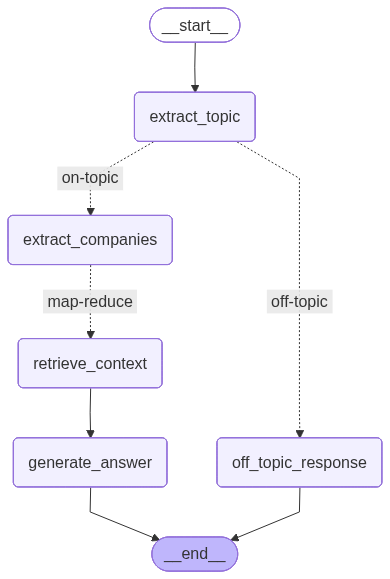

In [50]:
graph

We can now stream the graph to propagate the user query through the graph-based agent in oder to generate a final answer.

In [51]:
from util import print_graph_propagation

In [52]:
# Off-topic query
query = "How is the weather in New York?"

print_graph_propagation(graph, query)

In [53]:
# Query with specific DAX 40 companies
query = "What are the climate-related risks for Adidas and BMW?"

print_graph_propagation(graph, query)

In [54]:
# DAX 40 related query but without mentioning any specific company
query = "Which risks do corporations face due to climate change?"

print_graph_propagation(graph, query)

### <a id='toc4_3_'></a> Chatbot Provisioning

**LangGraph Studio** significantly **enhances the deployment of AI agents** by providing a comprehensive development environment tailored for LangGraph applications. It **allows developers to visualize, interact with, and debug agent workflows**, enabling the creation of scalable, production-ready AI agents with features like stateful computation, long-term memory, and human-in-the-loop capabilities.

There is one prerequisite to use LangGraph studio. You need to create a [**LangSmith**](https://smith.langchain.com/) API Key:
We set up a LangSmith account to use LangGraph Studio. LangGraph Studio offers an Integrated Development Environment (IDE) for visualizing, interacting with, and debugging complex applications built with LangGraph.

- Create an account
- Generate an API key

    <img src="img/langsmith.png" alt="Open API Key" width="700">

- Save the API key in a separate `.env` that you create in the subfolder `3_genai/studio/`: <br>
`LANGSMITH_API_KEY = <Your LangSmith key>` <br>
- Add also the following environment variables to the `.env` file: <br>
`OPENAI_API_KEY = <Your OpenAI key>` <br>
`TAVILY_API_KEY = <Your OpenAI key>` <br>
`LANGSMITH_TRACING = true` <br>
`LANGSMITH_ENDPOINT = https://api.smith.langchain.com`
`LANGSMITH_PROJECT = 3_genai` <br>

In [55]:
!cd ../3_genai/studio && langgraph dev

^C


Wait for LangGraph Studio opening automatically in your default browser.

![LangGraph](img/langgraph.gif)